In [2]:
import numpy as np # gọi thư viện numpy gán np
import pandas as pd # gọi thư viện pandas gán pd
import matplotlib.pyplot as plt # gọi thư viện matplotlib gán plt
import seaborn as sns # gọi thư viện seaborn gán sns

### PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING
1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên

In [3]:
def load_data(df): # Hàm load_data để tải dữ liệu từ tệp CSV
    data = pd.read_csv(df) # Đọc dữ liệu từ tệp CSV và lưu vào DataFrame
    return data # Trả về DataFrame

df = 'titanic_disaster.csv' # Gán đường dẫn csv
data = load_data(df) # Gọi hàm load_data để tải dữ liệu
data.head(10) # Hiển thị 10 dòng đầu tiên

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

In [4]:
missing_data = data.isnull().sum() # Tính toán số lượng giá trị thiếu trên mỗi biến số
missing_data # Hiển thị số lượng giá trị thiếu

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

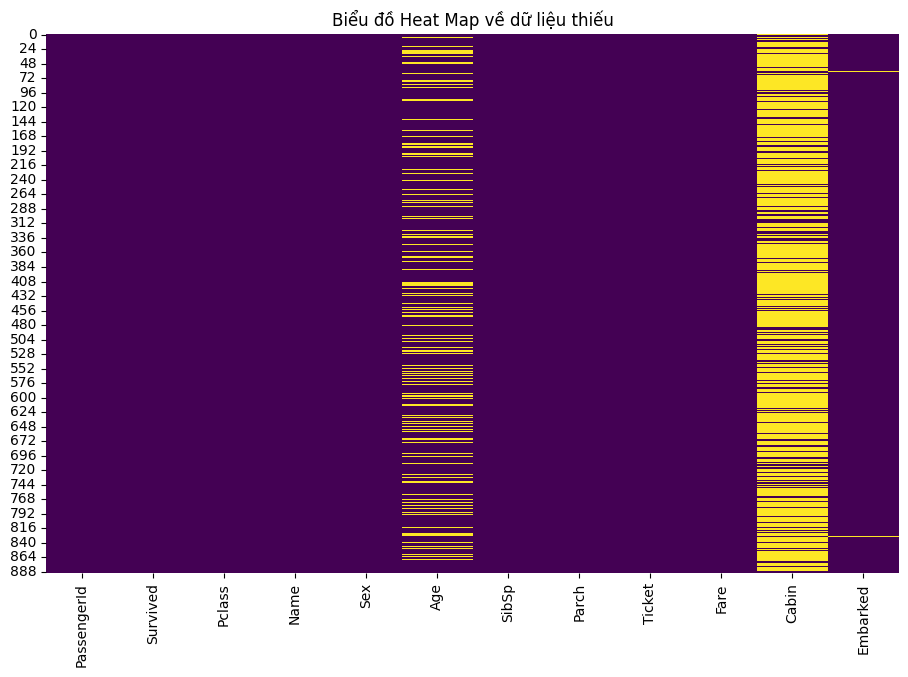

In [5]:
plt.figure(figsize=(11, 7)) # Tạo một hình ảnh với kích thước 10x6.
sns.heatmap(data.isnull(), cbar=False, cmap='viridis') # Vẽ biểu đồ Heat map cho dữ liệu thiếu
plt.title('Biểu đồ Heat Map về dữ liệu thiếu') # Đặt tiêu đề cho biểu đồ
plt.show() # Hiển thị biểu đồ

3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name

In [6]:
data[['firstName', 'secondName']]= data['Name'].str.split(",",expand = True) # Chia cột Name thành hai cột firstName, secondName

In [7]:
# Xóa cột Name
data.drop('Name', axis=1, inplace=True)
data.head() # Hiển thị 5 dòng đầu tiên

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


4. Xử lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male -> M và female -> F

In [8]:
data['Sex'].replace({'male':'M','female':'F'}, inplace=True) # Thay thế giá trị cột Sex từ male thành M, female thành F
data.head() # Hiển thị 5 dòng đầu tiên

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

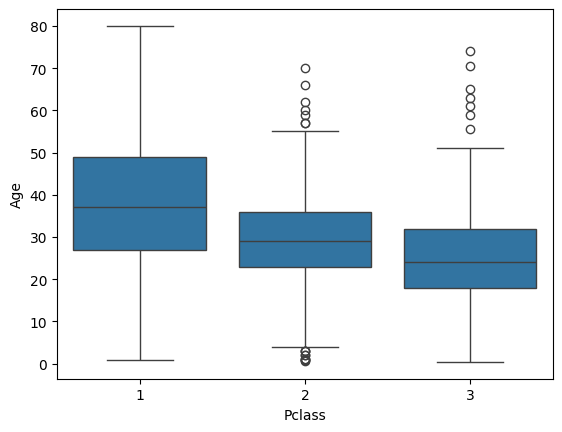

In [9]:
sns.boxplot(y='Age', x='Pclass', data = data) # Vẽ biểu đồ boxplot để trực quan hóa Age theo từng Pclass

In [10]:
data['Age'].fillna(round(data['Age'].mean()), inplace= True) # Điền giá trị thiếu cột Age bằng giá trị trung bình cột
data.head(10) # Hiển thị 10 dòng đầu tiên

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
5,6,0,3,M,30.0,0,0,330877,8.4583,NaN,Q,Moran,Mr. James
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem)


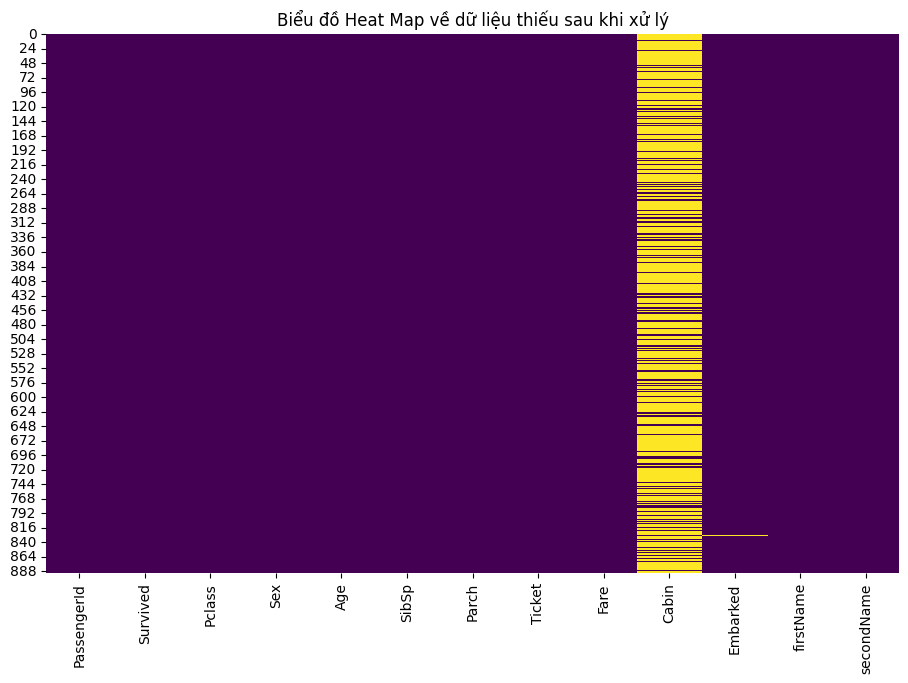

In [11]:
plt.figure(figsize=(11, 7)) # Tạo khung hình với kích thước 11x7
sns.heatmap(data.isnull(), cbar=False, cmap='viridis') # Tạo Heatmap trực quan hóa dữ liệu thiếu sau khi xử lý. 
plt.title('Biểu đồ Heat Map về dữ liệu thiếu sau khi xử lý') # Đặt tiêu đề
plt.show() # Hiển thị biểu đồ

6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12] Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older

In [12]:
data.loc[(data['Age'] <= 12), 'Agegroup'] = 'Kid' # Đặt giá trị Kid vào cột Agegroup cho hàng có Age <= 12
data.loc[(data['Age'] > 12) & (data['Age'] <= 18), 'Agegroup'] = 'Teen' # Đặt giá trị Teen vào cột Agegroup cho hàng có Age > 12 và Age<= 18
data.loc[(data['Age'] > 18) & (data['Age'] <= 60), 'Agegroup'] = 'Adult' # Đặt giá trị Adult vào cột Agegroup cho hàng có Age > 18 và Age <= 60
data.loc[(data['Age'] > 60), 'Agegroup'] = 'Older' # Đặt giá trị Older vào cột Agegroup cho hàng có Age > 60

In [13]:
data.head(10) # Hiển thị 10 dòng đầu tiên

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult
5,6,0,3,M,30.0,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen


7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi 'secondName'

In [14]:
# Thêm cột namePrefix từ firstName
data['namePrefix'] = data['secondName'].str.extract(r'(\w+\.)')
# Trích xuất phần tên tiền tố (prefix) từ secondName, lưu vào cột namePrefix
data['secondName'] = data['secondName'].str.replace(r'(\w+\.\s*)', '', regex=True) # Xóa tiền tố (prefix) khỏi secondName bằng cách thay thế phần biểu thức chính quy (\w+\.\s*) bằng chuỗi rỗng

In [15]:
data.head(10) # Hiển thị 10 dòng đầu tiên

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,Mr.
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,Mrs.
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,Miss.
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,Mrs.
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,Mr.
5,6,0,3,M,30.0,0,0,330877,8.4583,NaN,Q,Moran,James,Adult,Mr.
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Timothy J,Adult,Mr.
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Gosta Leonard,Kid,Master.
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs.
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Nicholas (Adele Achem),Teen,Mrs.


8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

In [16]:
# Tạo cột familySize
data['familySize'] = 1 + data['SibSp'] + data['Parch'] # Tạo cột familySize bằng cách tính tổng số SibSp và Parch cộng thêm một (bản thân hành khách)
data.head() # Hiển thị 5 dòng đầu tiên

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,Mr.,2
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,Mrs.,2
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,Miss.,1
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,Mrs.,2
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,Mr.,1


9. Tạo thêm đặc trưng 'Alone' để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0

In [17]:
# Tạo cột Alone
data['Alone'] = data['familySize'].apply(lambda x: 1 if x == 1 else 0) # Tạo cột Alone để xác định liệu hành khách có đi cá nhân hay theo nhóm. Nếu 'familySize' bằng 1, giá trị là 1, ngược lại là 0
data.head(10) # Hiển thị 10 dòng đầu tiên

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize,Alone
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,Mr.,2,0
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,Mrs.,2,0
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,Miss.,1,1
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,Mrs.,2,0
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,Mr.,1,1
5,6,0,3,M,30.0,0,0,330877,8.4583,NaN,Q,Moran,James,Adult,Mr.,1,1
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Timothy J,Adult,Mr.,1,1
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Gosta Leonard,Kid,Master.,5,0
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs.,3,0
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Nicholas (Adele Achem),Teen,Mrs.,2,0


10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng 'Unknown'

In [18]:
data['typeCabin'] = data['Cabin'].fillna('Unknown') # Thay thế giá trị thiếu trong cột Cabin bằng Unknown, lưu vào cột typeCabin
typeCabin = data['typeCabin'] # Gán cột typeCabin cho biến typeCabin
for i in range(len(typeCabin)): # Duyệt qua từng giá trị trong cột typeCabin
  temp = str(typeCabin[i])
  if temp != 'Unknown': # Nếu giá trị khác 'Unknown'
    typeCabin[i] = temp[:1] # Lấy ký tự đầu tiên của giá trị đó

C:\Users\Pc\AppData\Local\Temp\ipykernel_17360\1053027339.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  typeCabin[i] = temp[:1] # Lấy ký tự đầu tiên của giá trị đó


In [19]:
data.head() # Hiển thị 5 dòng đầu tiên

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize,Alone,typeCabin
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,Mr.,2,0,Unknown
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,Mrs.,2,0,C
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,Miss.,1,1,Unknown
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,Mrs.,2,0,C
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,Mr.,1,1,Unknown


### PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA
12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính

In [20]:
SurvivedSex = data.groupby(['Survived','Sex'])[['Sex']].count().unstack() # Nhóm dữ liệu theo hai cột Survived và Sex, chuyển đổi cấu trúc thành dạng không chồng (unstack)
SurvivedSex  # Hiển thị SurvivedSex

Sex     
Sex         F    M
Survived          
0          81  468
1         233  109

array([<AxesSubplot:ylabel='F'>, <AxesSubplot:ylabel='M'>], dtype=object)

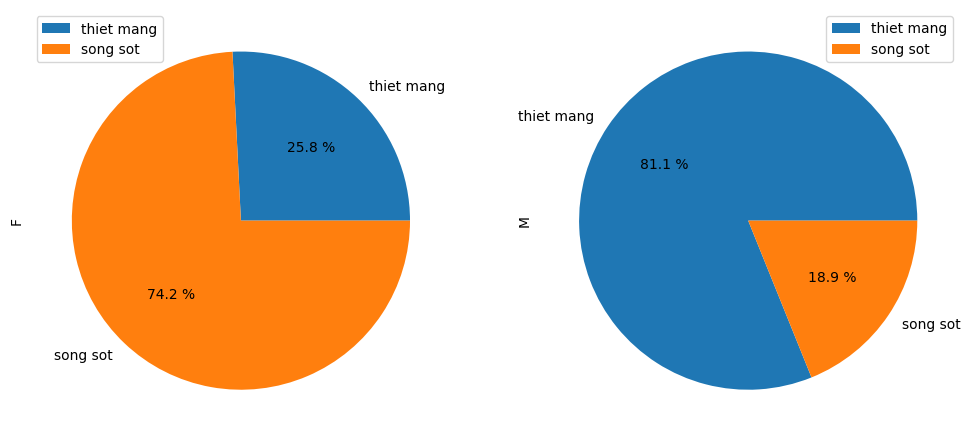

In [47]:
SurvivedSex['Sex'].rename(index={1:'song sot',0:'thiet mang'}).plot.pie(autopct = '%.1f %%', subplots=True, figsize=(12, 7))
# Đổi tên giá trị trong cột Sex thành song sot và thiet mang theo 1, 0. Vẽ biểu đồ hình tròn cho mỗi giới tính, hiển thị tỷ lệ phần trăm với định dạng %.1f %%, cho kích thước biểu đồ là (12, 7)

# Nhận xét:
# Biểu đồ cho thấy nữ giới có tỷ lệ sống sót cao hơn nam giới

13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).

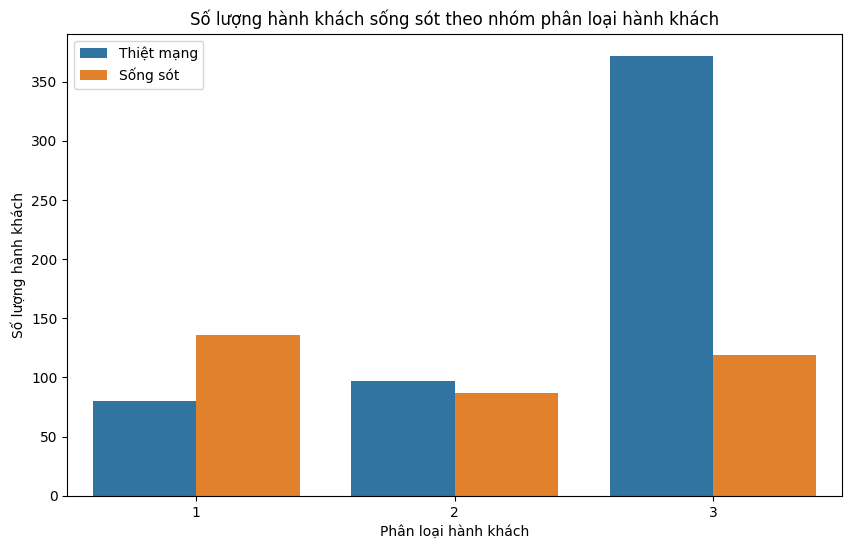

In [79]:
plt.figure(figsize=(10, 6)) # Tạo khung mới với kích thước (10, 6)
sns.countplot(data=data, x='Pclass', hue='Survived') # Vẽ biểu đồ đếm cho cột Pclass, phân chia màu sắc theo cột Survived
plt.title('Số lượng hành khách sống sót theo nhóm phân loại hành khách') # Đặt tên tiêu đề
plt.xlabel('Phân loại hành khách') # Đặt tên trục x
plt.ylabel('Số lượng hành khách') # Đặt tên trục y
plt.legend(['Thiệt mạng', 'Sống sót']) # Tạo chú thích cho biểu đồ
plt.show() # Hiển thị biểu đồ

# Nhận xét:
# Hành khách hạng nhất có tỷ lệ sống sót cao nhất, tiếp theo là hạng hai và hạng ba có tỷ lệ sống sót thấp nhất.

14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác

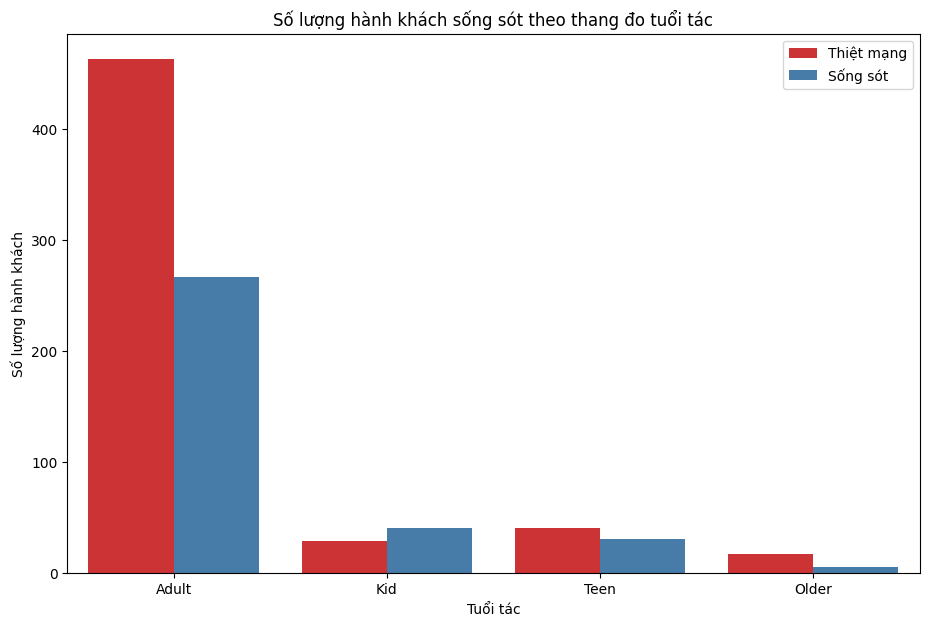

In [39]:
# Trực quan thông tin hành khách sống sót trên thang đo tuổi tác
plt.figure(figsize=(10, 6)) # Tạo khung mới với kích thước (10, 6)
sns.countplot(data=data, x='Agegroup', hue='Survived', palette='Set1') # Vẽ biểu đồ đếm cho cột Agegroup, phân chia màu sắc theo cột Survived và sử dụng bảng màu Set1
plt.title('Số lượng hành khách sống sót theo thang đo tuổi tác') 
# Đặt tên tiêu đề
plt.xlabel('Tuổi tác') # Đặt tên trục x
plt.ylabel('Số lượng hành khách') # Đặt tên trục y
plt.legend(['Thiệt mạng', 'Sống sót']) # Tạo chú thích cho biểu đồ
plt.show() # Hiển thị biểu đồ

# Nhận xét:
# Người lớn, trẻ em, người trẻ có tỷ lệ sống sót cao hơn, trong khi người già có tỷ lệ thiệt mạng cao hơn

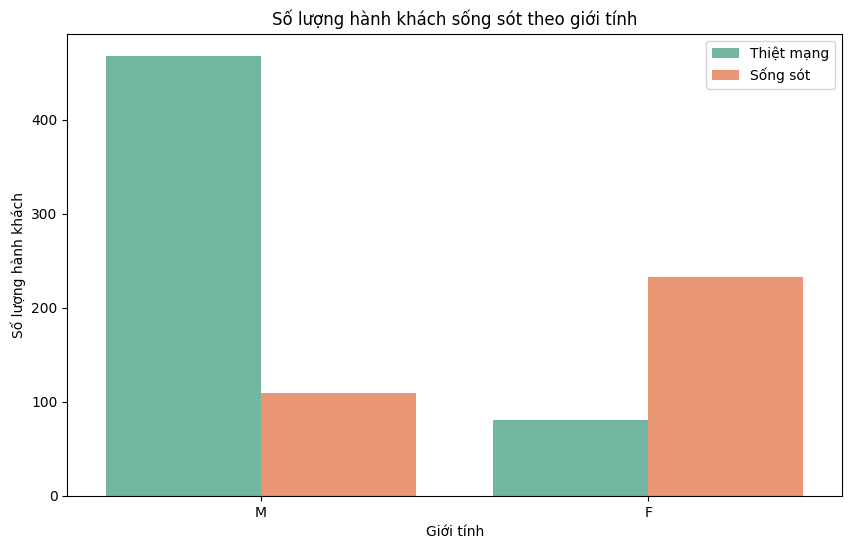

In [41]:
# Trực quan thông tin hành khách sống sót trên từng nhóm giới tính
plt.figure(figsize=(10, 6)) # Tạo khung mới với kích thước (10, 6)
sns.countplot(data=data, x='Sex', hue='Survived', palette='Set2')
# Vẽ biểu đồ đếm cho cột Sex, phân chia màu sắc theo cột Survived và sử dụng bảng màu Set2
plt.title('Số lượng hành khách sống sót theo giới tính') # Đặt tên tiêu đề
plt.xlabel('Giới tính') # Đặt tên trục x
plt.ylabel('Số lượng hành khách') # Đặt tên trục y
plt.legend(['Thiệt mạng', 'Sống sót']) # Tạo chú thích cho biểu đồ
plt.show() # Hiển thị biểu đồ

# Nhận xét:
# Nữ giới có tỷ lệ sống sót cao hơn, trong khi nam giới có tỷ lệ thiệt mạng cao hơn

15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng

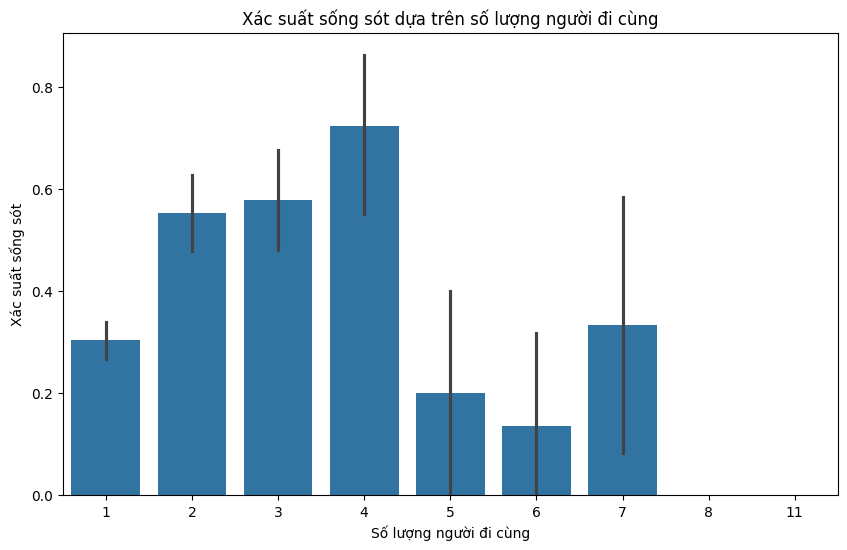

In [29]:
plt.figure(figsize=(10, 6)) # Tạo khung mới với kích thước (10, 6)
sns.barplot(x='familySize', y='Survived', data=data) # Vẽ biểu đồ cột, trục x là cột familySize, trục y là cột Survived từ Dataframe
plt.title('Xác suất sống sót dựa trên số lượng người đi cùng') 
# Đặt tên tiêu đề
plt.xlabel('Số lượng người đi cùng') # Đặt tên trục x
plt.ylabel('Xác suất sống sót') # Đặt tên trục y
plt.show() # Hiển thị biểu đồ

# Nhận xét:
# Hành khách có từ 2-4 người đi cùng có tỷ lệ sống sót cao hơn. Số lượng người đi cùng quá lớn hoặc đi một mình có tỷ lệ sống sót thấp hơn

16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé

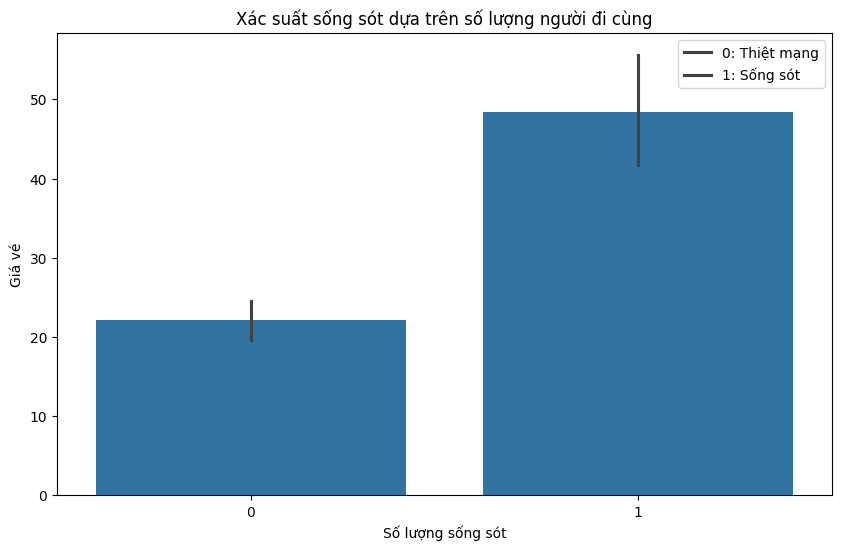

In [65]:
plt.figure(figsize=(10, 6)) # Tạo khung mới với kích thước (10, 6)
sns.barplot(y='Fare', x='Survived', data=data) # Vẽ biểu đồ cột, trục x là cột Survived, trục y là cột Fare từ Dataframe
plt.title('Xác suất sống sót dựa trên số lượng người đi cùng')
# Đặt tên tiêu đề
plt.xlabel('Số lượng sống sót') # Đặt tên trục x
plt.ylabel('Giá vé') # Đặt tên trục y
plt.legend(['0: Thiệt mạng', '1: Sống sót']) # Tạo chú thích cho biểu đồ
plt.show() # Hiển thị biểu đồ

# Nhận xét:
# Hành khách mua giá vé cao hơn có tỷ lệ sống sót cao hơn, trong khi hành khách mua giá vé thấp hơn có tỷ lệ thiệt mạng cao hơn

17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và cảng sẽ cập bến

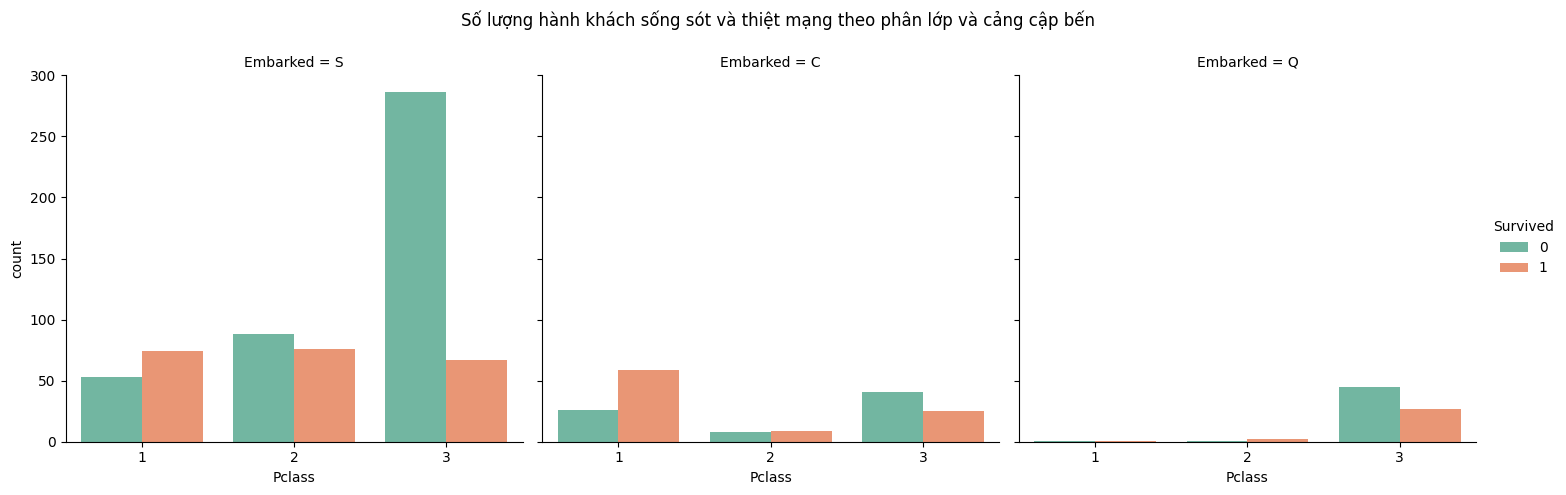

In [77]:
sns.catplot( # Vẽ một biểu đồ phân loại
    data=data, # Láy dữ liệu từ DataFrame 
    x='Pclass', # Trục x là cột Pclass
    hue='Survived', # Phân chia màu sắc theo cột Survived
    col='Embarked', # Tạo biểu đồ con (subplots) cho từng giá trị trong cột Embarked
    kind='count', # Loại biểu đồ là count (đếm số lượng)
    palette='Set2', # Sử dụng bảng màu Set2
    height= 5, # Đặt chiều cao biểu đồ = 5
    aspect=1 # Đặt tỷ lệ biểu đồ = 1
)

plt.subplots_adjust(top=0.85) # Điều chỉnh khoảng cách giữa các biểu đồ con, lề trên cùng là 0.85
plt.suptitle('Số lượng hành khách sống sót và thiệt mạng theo phân lớp và cảng cập bến') # Đặt tên tiêu đề
plt.show() # Hiển thị biểu đồ

# Nhận xét:
# Hành khách hạng nhất cập bến tại cảng S có tỷ lệ sống sót cao nhất, trong khi hành khách hạng ba cập bến tại cảng Q có tỷ lệ thiệt mạng cao nhất